# Обучение с применением учителя (supervised learning)
### Основные определения

$X$ &ndash; множество объектов <br/>
$Y$ &ndash; множество ответов <br/>
$y^*: X \rightarrow Y$ &ndash; целевая функция <br/>

Пусть для набора объектов $X$ задан набор отображений $f_1, \dots, f_n: X \rightarrow D_{f_i}$ . Будем называть их признаками, значения $f_i$ - результат измерения некоторой характеристики объекта $x  \in X$ .
* если $D_{f_i}$ - конечное множество, то $f_i$ - *номинальный* признак
* если $D_{f_i} = \{0, 1\}$ , то $f_i$ - *бинарный* признак 
* если $D_{f_i} = \mathbb R$ , то $f_i$ - *количественный* признак

Таким образом, кажому объекту $x \in X$ можно сопоставить $(f_1, \dots, f_n)$ который называется признаковым описанием объекта $x$.

### Постановка задачи

Значения целевой функции известны на конечном множестве объектов: <br/> $\{x_1, \dots, x_l\} \subset X$

$T^l = \{(x_i, y_i)\}^l_{i=1}$ &ndash; обучающая выборка

По выборке $T^l$ нужно восстановить зависимость $y^*$, то есть построить функцию <br/> $a: X \rightarrow Y$,<br/>
которая достаточно хорошо приближала бы функцию $y^*$ на всём множестве $X$.

### Типы задач

##### В зависимости от множества $Y$ задачу можно разделить на следующие типы:
Задача классификации
>$Y=\{1,\dots,M\}$

Восстановления регрессии
> $Y=\mathbb R$ 

##### В зависимости от известных данных и области применения:

Transductive learning 
> если все объекты $X$ известны во время обучения.

Semi-supervised learning 
> если во время обучения помимо $T^l$ дано ещё большое количество объекто $S^u = \{x_{l+1}, \dots, x_{l+u}\} \subset X$ для которых неизвестно значение функции $y^*$. Обычно $l \ll u$.

### Функционал качества

Пусть $a$ функция ("алгоритм"), которую мы нашли в процессе решения задачи. Пусть функция задана функция $\mathbb L(a,x_i)$, характеризующая величину ошибки функции $a$ на объекте $x_i$: $a(x_i)$. Если ответ алгоритма в точке $x_i$ корректен, тогда $\mathbb L(a,x_i)=0$

Определим *функционал качества* на тренировочном множестве $X$ как среднее значение функции потерь на элементах этого множества:<br/> 
$Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}\mathbb L(a,x_i)$

Примеры функций потерь:
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}[a(x) \neq y^*(x)]$ &mdash; индикатор ошибки
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}|a(x) - y^*(x)|$ &mdash; средняя ошибка
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}(a(x) - y^*(x))^2$ &mdash; серднеквадратичная ошибка

### Модель алгоритмов обучения

Если мы ищем алгоритм $a(x)$ из некоторого параметрического семейства $A = \{a(x, \theta) | \theta \in \Theta\}$, $a(x) \in A$, то $A$ называется моделью алгоритмов, а $\Theta$ называется пространством параметров. 

Соотве нам нужно минимизировать функционал качества по $\theta$: <br/>

$$a(x) = \arg \min_{\theta \in \Theta}  Q(a(x, \theta), X^l)$$

# Примеры

In [3]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np

 Пример задачи восстановления регрессии - по характеристика квартиры нужно предположить рыночную цену.

In [4]:
#df = pd.read_csv('data/real_estate.csv')
df = pd.read_csv('http://pastebin.com/raw.php?i=RcHeuYJ4')
df.head(5)

,Unnamed: 0,Комнат,Район города,Адрес,Этаж,Общ,Жил,Кух,М,Тел,Примечания,#Цена
0,1,1,Московский,Пулковское ш.,0/0,35.7,0.0,0.0,NaN,NaN,NaN,3820.0
1,2,1,Московский,Пулковское ш.,0/0,27.5,0.0,0.0,NaN,NaN,NaN,3080.0
2,3,1,Московский,Московское ш.,0/0,35.5,0.0,0.0,NaN,NaN,NaN,3470.0
3,4,1,Московский,Московское ш.,0/0,33.5,0.0,0.0,NaN,NaN,NaN,2989.0
4,5,1,Московский,Московское ш.,0/0,24.2,0.0,0.0,NaN,NaN,NaN,2261.0


Пример набора данных для задачи semi-supervised learning ("с чатсичным привлечением учителя"). Дано большое количество непомеченных данных и много меньше почеченных. Информация о непомеченных данных помогает восстановить некоторые характеристики.

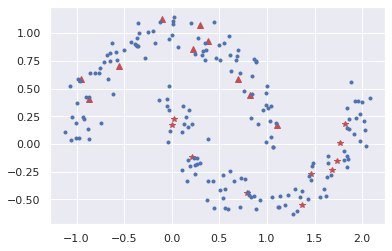

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

xy, c = ds.make_moons(200, False, 0.09)

ind0 = np.arange(0, 100)
ind1 = np.arange(100, 200)
np.random.shuffle(ind0)
np.random.shuffle(ind1)

plt.plot(xy[ind0[:10], 0], xy[ind0[:10], 1], 'r^')

plt.plot(xy[ind1[:10], 0], xy[ind1[:10], 1], 'r*')

plt.plot(xy[ind0[10:], 0], xy[ind0[10:], 1], 'b.')
plt.plot(xy[ind1[10:], 0], xy[ind1[10:], 1], 'b.')
plt.show()

Классический набор данных для задачи классификации - по характеристиками цветка
- длина наружной доли околоцветника (sepal length)
- ширина наружной доли околоцветника (sepal width)
- длина внутренней доли околоцветника (petal length)
- ширина внутренней доли околоцветника (petal width)

нужно восстановить к какому виду Ириса пренадлежит конктретный экземпляр - 

- Ирис щетинистый (Iris setosa)
- Ирис виргинский (Iris virginica)
- Ирис разноцветный (Iris versicolor). 



In [6]:
data = ds.load_iris()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['Class'] = data['target']
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


# Линейная регрессия

Будем искать алгоритм $a(x)$ в виде: $$a(x, \theta_0, \dots, \theta_n)=\theta_0 + \theta_1  f_1(x) + \dots + \theta_n  f_n(x)$$ <br/>
Для простоты определим функцию $f_0(x)\equiv 1$, и будем отождествлять объект $x \in X$ с вектором $x \longrightarrow (f_0(x), \dots, f_n(x)) = (x_0, \dots, x_n)$

Такми образом наш алгоритм будет иметь вид: $a(x)=\hat{y}=x^T\theta$ .
Пусть дано тренировочное множество $X=\{x_1, \dots, x_l\}$, представим его в виде матрицы:
$$X=\begin{pmatrix} x_{1,0} & \dots & x_{1, n} \\ \vdots & \vdots & \vdots \\ x_{l,0} & \dots & x_{l, n}  \end{pmatrix}$$  

Известные значения в тренировочном множестве можно представить в виде вектора:
$$Y^* = \begin{pmatrix} y^*_{1}\\ \vdots \\ y^*_{l}   \end{pmatrix}$$ 

Тогда функция потерь примет вид:
$$Q(\theta)= \frac{1}{l} \sum_{i=1}^{l}(y^*_i-x_i^T\theta)^2= \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta)$$

Продифференцируем по компонентам $\theta$, получим условие: 
$$X^T(Y^*-X\theta)=0$$ 
Затем:
$$X^T Y^*- X^T X \theta = 0$$ 
$$\theta = (X^T X)^{-1} X^T Y^* $$

### Пример 

cгенерируем 300 объектов размерности 1

In [7]:
l, n = 300, 1

np.random.seed(5)
X = np.random.uniform(low=0.0, high=30.0, size=(l, n))
X[:10]

array([[ 6.65979513],
       [26.12196919],
       [ 6.20157466],
       [27.55832724],
       [14.65233566],
       [18.35231589],
       [22.97723569],
       [15.55253964],
       [ 8.90401505],
       [ 5.63163686]])

Добавим к ним "искуственные" единицы, отвечающие за свободныу компоненту

In [8]:
X = np.hstack((np.ones(shape=(l, 1)), X))

In [9]:
X[:10]

array([[ 1.        ,  6.65979513],
       [ 1.        , 26.12196919],
       [ 1.        ,  6.20157466],
       [ 1.        , 27.55832724],
       [ 1.        , 14.65233566],
       [ 1.        , 18.35231589],
       [ 1.        , 22.97723569],
       [ 1.        , 15.55253964],
       [ 1.        ,  8.90401505],
       [ 1.        ,  5.63163686]])

Будет считать, что существует зависимость функцией $y = 15.4 + 7.2  x$. Сгенерируем "ответы" с добавлением нормально-распреленного шума.

In [10]:
Y = 15.4 * X[:,0] + 7.2 * X[:,1] + np.random.normal(0., 10., size=l)
Y = Y.reshape((-1, 1))
Y[:10]

array([[ 63.17699227],
       [202.20159591],
       [ 41.97217131],
       [223.75964588],
       [105.98552819],
       [134.71559959],
       [177.0790229 ],
       [127.72472414],
       [ 79.95968992],
       [ 48.31031646]])

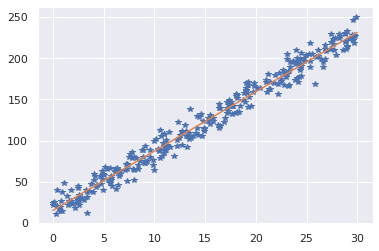

In [11]:
plt.plot(X[:,1], Y, '*')

dx = np.linspace(0, 30, 50)
dy = 15.4 + 7.2 * dx 
plt.plot(dx, dy)

plt.show()

Теперь восстановим наши коэффиценты

In [12]:
"""
theta = np.dot(np.linalg.pinv(np.dot(X.T, X)), 
               np.dot(X.T, Y)) 
"""


theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [13]:
theta

array([[15.4246964 ],
       [ 7.20311498]])

### Решение с помощью численного нахождения минимума функционала качества

$$X=\begin{pmatrix} x_{1,0} & \dots & x_{1, n} \\ \vdots & \vdots & \vdots \\ x_{l,0} & \dots & x_{l, n}  \end{pmatrix}$$  
$$Y^* = \begin{pmatrix} y_{1}^*\\ \vdots \\ y_{l}^*   \end{pmatrix}$$ 
$$Q(\theta)=  \sum_{i=1}^{l}(y_i^*-x_i^T\theta)^2= \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta)$$

Найдем частные прозводные по коэффицентам и, соответственно, градиент

$$\frac{\partial Q}{\partial \theta_j} = 2 \sum_{i=1}^{l}(x_i^T\theta-y^*_i) x_{i,j} $$
$$grad(Q) = 2 (X \theta-Y^*)^TX $$

### Пример

Воспользуемся методам нахождения минимума из библиотеки `scipy`

In [14]:
import scipy as sp

def func_to_min(theta):
    theta = theta.reshape((-1, 1))
    return np.sum((X @ theta - Y) ** 2)    


def func_grad(theta):
    theta = theta.reshape((-1, 1))
    return (X @ theta - Y).T @ X
   

sp.optimize.fmin_tnc(func_to_min, np.array([1., 1.]), func_grad) 
sp.optimize.fmin_l_bfgs_b(func_to_min, np.array([1., 1.]), func_grad, approx_grad=False)
#help(sp.optimize.fmin_l_bfgs_b)

(array([15.4246964 ,  7.20311498]),
 28792.667205205376,
 {'grad': array([[3.01496073e-09, 6.27795771e-09]]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 11,
  'nit': 6,
  'warnflag': 0})

Можно визуализировать функцию потерь и от параметров в трехмерном пространстве

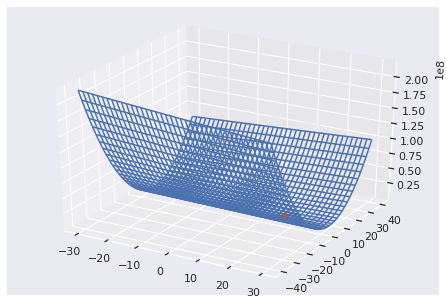

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

dx = np.linspace(-30, 30, 40)
dy = np.linspace(-40, 40, 40)
dX, dY = np.meshgrid(dx, dy)

dZ = np.array([func_to_min(np.array([x, y])) for x, y in zip(dX.ravel(), dY.ravel())])
dZ = dZ.reshape((-1, 40))
ax.plot3D([15.4], [7.2], func_to_min(np.array([15.4, 7.2])), 'r*')
ax.plot_wireframe(dX, dY, dZ)


# Регуляризация

Если матрицы $X^TX$ вырождена, то столбцы матрицы $X$ линейно зависимы. Это фактически означает, что некоторые признаки линейно зависимы друг от друга и их нужно отбросить. Чаще возникакет проблема *мультиколлинеарности*, когда $X^TX$ близка к некоторой матрице неполного ранга, что влечет за собой неустойчивость решения и переобучение. 

Для решения этой проблемы можно добавить к функционалу $Q$ регуляризатор, штрафующий за большие абсолютные значения компонентов вектора $\theta$
$$Q(\theta) = (Y^*-X\theta)^T(Y^*-X\theta) + \alpha \theta^T \theta$$

Параметр $\alpha$ определяет "значимость штрафоного слагаемого".  В таком виде мы можем найти решение аналитически:

Продифференцируем по компонентам $\theta$, получим условие: 
$$X^T(Y^*-X\theta) + \alpha\theta=0$$ 
Затем:
$$X^T Y^*- X^T X \theta + \alpha\theta= 0$$ 
$$\theta = (X^T X + \alpha I_n)^{-1} X^T Y^* $$

In [16]:
import ipywidgets

%matplotlib inline

l, n = 6, 1

np.random.seed(25)
X = np.random.uniform(low=0.0, high=5.0, size=(l, n))
X = np.hstack((np.ones((l, 1)),                 
               X, 
               X**2,
               X**3,
               X**4,
               X**5
              ))
            
Y = 15.4 + 7.2 * X[:,1] + np.random.normal(0., 50., size=l)


def solve(alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(6)) @ X.T @ Y
    plt.plot(X[:,1], Y, '*')

    dx = np.linspace(-2, 6, 300)
    dy = theta[0] 
    for i in range(1, 6):
        dy += theta[i] * (dx ** i)
     
    plt.plot(dx, 15.4 + 7.2 * dx)
    plt.plot(dx, dy)    
    
    plt.xlim((-2, 6))
    plt.ylim((-100, 100))
    
    plt.show()
    
ipywidgets.interactive(solve, alpha=ipywidgets.FloatSlider(min=0., max=30., step=0.1, value=0.1))

interactive(children=(FloatSlider(value=0.1, description='alpha', max=30.0), Output()), _dom_classes=('widget-…

# Дилемма смещения–дисперсии (Bias–variance tradeoff)

Компромисс отклонение-дисперсия -- свойство моделей, когда модели с меньшим отклонением от имеющихся данных имеют более высокую дисперсию, и наоборот. 

*Смещение (bias)* -- это ошибка, возникающая в результате ошибки  модели (недообучение, underfitting).

*Дисперсия (variance)* -- чувствительность к малым отклонениям в тренировочном наборе (переобучение, overfitting).


Для примера сгенерируем одномерный набор данных и построим три линейных модели без регуляризации:
- не учитывая признак
- учитывая признак
- добавляем новые признаки - степени от существующего


In [17]:
import pandas as pd
l, n = 10, 1

df = pd.DataFrame()
df['x0'] = np.ones(l)
# значения признаков
df['x1'] = np.linspace(0, 1, l) 

#добавляем `полиномиальные` признаки
for p in range(2, 9):
    df[f'x{p}'] = df['x1'] ** p
        
#df['x2'] = df['x1'] ** 2
#df['x3'] = df['x1'] ** 3
#df['x4'] = df['x1'] ** 3

def true_func(x):
    return 5 * x + 3.0 

df['y'] = true_func(df['x1']) + np.random.normal(0.0, 2., size=l)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.305914
1,1.0,0.111111,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,0.886233
2,1.0,0.222222,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,4.263870
3,1.0,0.333333,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,2.174488
4,1.0,0.444444,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,7.626767


Отобразим исходные данные

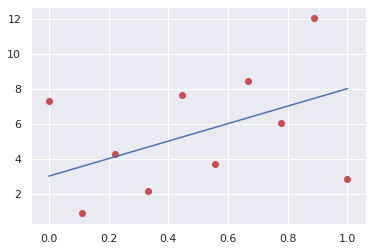

In [18]:
plt.plot(df['x1'], true_func(df['x1']))
plt.scatter(df['x1'], df['y'], c='r')

Решение

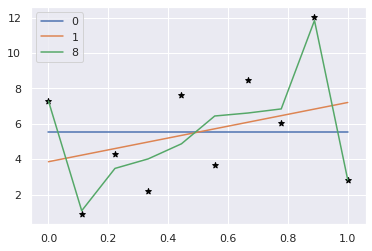

In [19]:
def solve_lr_simple(X, Y):
    return np.linalg.pinv(X.T @ X) @ X.T @ Y


X0 = df[['x0']]
coef0 = solve_lr_simple(X0.values, df['y'].values)

X1 = df[['x0', 'x1']]
coef1 = solve_lr_simple(X1.values, df['y'].values)

X8 = df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
coef8 = solve_lr_simple(X8.values, df['y'].values)

plt.scatter(df['x1'], df['y'], marker='*', c='black')
plt.plot(df['x1'], X0.values @ coef0.T, label='0')
plt.plot(df['x1'], X1.values @ coef1.T, label='1')
plt.plot(df['x1'], X8.values @ coef8.T, label='8')
plt.legend()

Видно, что в случае дополнительных 'полиномиальных признаков' мы переобучуемся

Математически можно вывести зависимость так:

$$y^* = f(x) + \varepsilon$$

$$\operatorname{E}\big[(y^* - a(x))^2\big]  = (f-\operatorname{E}[a(x)])^2+\operatorname{Var}[\varepsilon]+\operatorname{Var}\big[a(x)\big]\\[5pt]
 $$